In [1]:
import os
import joblib
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg

In [7]:
from GraphicSetting import *
import hds_stats as hds

In [2]:
os.getcwd()

'C:\\Users\\hdsce\\Documents\\PythonDataAnalysis2\\live'

In [3]:
os.chdir('../data')

In [4]:
os.listdir()

['Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

In [5]:
df = joblib.load('Used_Cars_Price_Prep.z')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1251 non-null   int64 
 1   Age       1251 non-null   int64 
 2   KM        1251 non-null   int64 
 3   FuelType  1251 non-null   object
 4   HP        1251 non-null   int64 
 5   MetColor  1251 non-null   object
 6   Doors     1251 non-null   int64 
 7   Weight    1251 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 78.3+ KB


In [8]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Doors,Weight
0,13500,23,46986,Diesel,90,1,3,1165
1,13750,23,72937,Diesel,90,1,3,1165
2,13950,24,41711,Diesel,90,1,3,1165
3,14950,26,48000,Diesel,90,0,3,1165
4,13750,30,38500,Diesel,90,0,3,1170


In [9]:
df.insert(loc = 1, column = 'const', value = 1)

In [10]:
df.head()

,Price,const,Age,KM,FuelType,HP,MetColor,Doors,Weight
0,13500,1,23,46986,Diesel,90,1,3,1165
1,13750,1,23,72937,Diesel,90,1,3,1165
2,13950,1,24,41711,Diesel,90,1,3,1165
3,14950,1,26,48000,Diesel,90,0,3,1165
4,13750,1,30,38500,Diesel,90,0,3,1170


In [17]:
df = pd.get_dummies(data = df, 
                    prefix = [None], 
                    columns = ['FuelType'], 
                    drop_first = True, 
                    dtype = np.uint8)

In [18]:
df.dtypes

Price        int64
const        int64
Age          int64
KM           int64
HP           int64
MetColor    object
Doors        int64
Weight       int64
Petrol       uint8
dtype: object

In [19]:
cols = ['MetColor']
df[cols] = df[cols].astype(np.uint8)

In [20]:
df.dtypes

Price       int64
const       int64
Age         int64
KM          int64
HP          int64
MetColor    uint8
Doors       int64
Weight      int64
Petrol      uint8
dtype: object

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
train, valid = train_test_split(df, train_size = 0.7, random_state = 0)

In [24]:
y_var = 'Price'

In [25]:
trainX = train.drop(columns = y_var)
trReal = train[y_var].copy()
trReal.mean()

9732.848

In [26]:
validX = valid.drop(columns = y_var)
vaReal = valid[y_var].copy()
vaReal.mean()

9625.545212765957

In [29]:
??hds.stat.ols

In [30]:
fit1 = hds.stat.ols(y = trReal, X = trainX)

In [31]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     339.3
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.57e-243
Time:                        10:02:32   Log-Likelihood:                -7326.4
No. Observations:                 875   AIC:                         1.467e+04
Df Residuals:                     867   BIC:                         1.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4832.6730   2260.499     -2.138      0.033   -9269.362    -395.984
Age          -94.4704      2.961    -31.902      0.000    -100.283     -88.658
KM            -0.0170      0.001    -12.892      0.000      -0.020      -0.014
HP             2.2961      4.971      0.462      0.644      -7.460      12.052
MetColor      14.4447     75.854      0.190      0.849    -134.434     163.324
Doors         -5.0942     46.181     -0.110      0.912     -95.733      85.545
Weight        18.9523      2.256      8.401      0.000      14.524      23.380
Petrol      1283.4546    325.808      3.939      0.000     643.990    1922.919
==============================================================================
Omnibus:                       54.450   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.503
Skew:                          -0.314   Prob(JB):                     3.09e-31
Kurtosis:                       4.860   Cond. No.                     5.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
hds.stat.breushpagan(fit1)

,Statistic,P-Value,F-Value,F P-Value
0,62.997414,3.794481e-11,9.609181,1.526236e-11


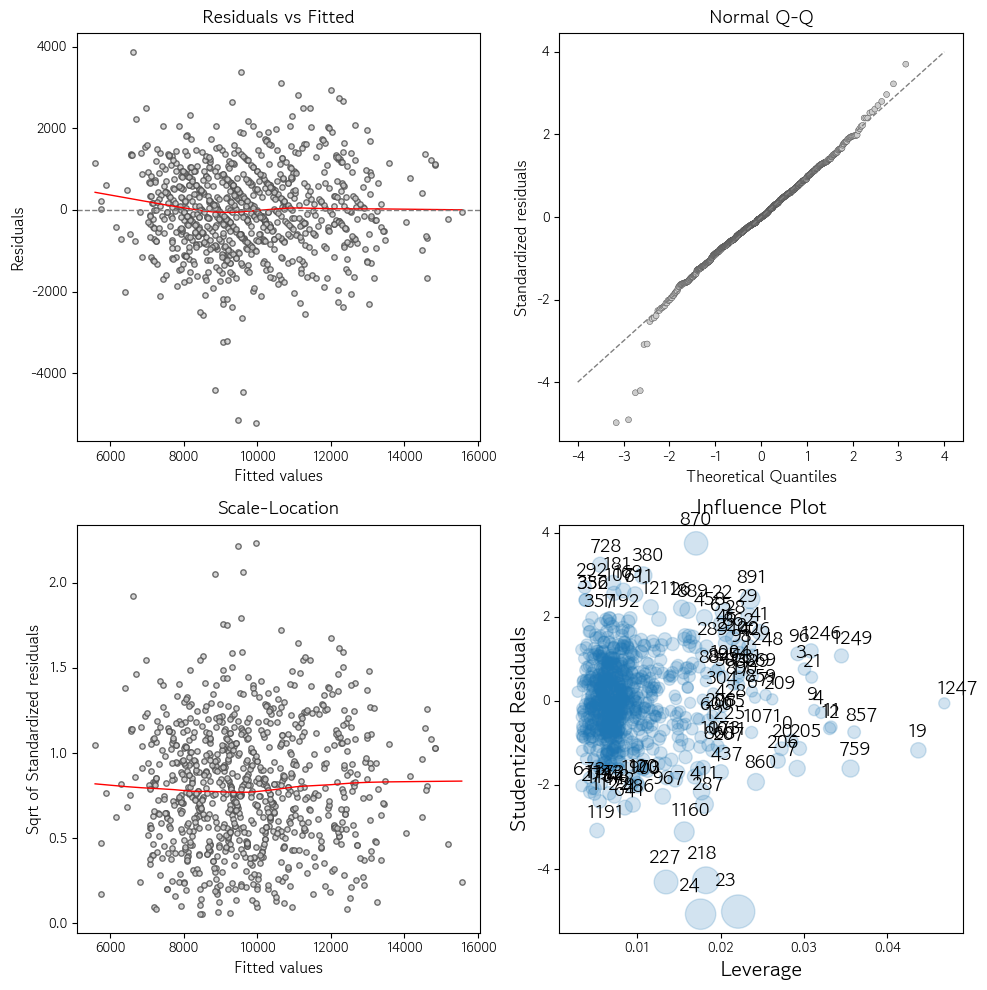

In [33]:
hds.stat.regressionDiagnosis(fit1)

In [34]:
fit1.resid

1116    1737.311742
65      1904.429813
412     -486.102722
1210    -600.133259
1219    1014.512067
           ...     
763     -795.952059
835      555.437108
1216   -1522.272505
559     -590.716942
684      749.156465
Length: 875, dtype: float64

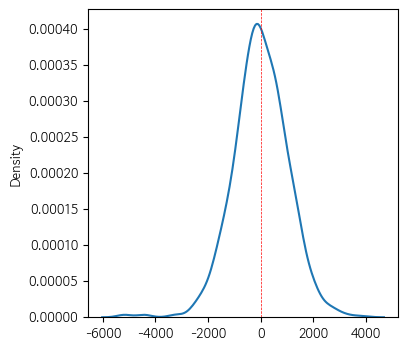

In [36]:
sns.kdeplot(x = fit1.resid)
plt.axvline(x = 0, color = 'red', lw = 0.5, ls = '--');

In [37]:
pg.normality(fit1.resid)

,W,pval,normal
0,0.983313,1.928031e-08,False


In [38]:
aug = hds.stat.augment(fit1)

In [39]:
aug

,Price,fitted,resid,hat,sigma,cooksd,std_resid
1116,9950,8212.688258,1737.311742,0.008931,1051.128267,0.003099,1.658558
65,13950,12045.570187,1904.429813,0.020054,1050.768082,0.008552,1.828390
412,9950,10436.102722,-486.102722,0.005722,1052.669413,0.000154,-0.463318
1210,8950,9550.133259,-600.133259,0.005730,1052.601081,0.000236,-0.572006
1219,8500,7485.487933,1014.512067,0.012813,1052.227829,0.001528,0.970426
...,...,...,...,...,...,...,...
763,7750,8545.952059,-795.952059,0.007481,1052.449637,0.000543,-0.759316
835,10900,10344.562892,555.437108,0.009871,1052.628863,0.000351,0.530510
1216,8250,9772.272505,-1522.272505,0.007817,1051.518120,0.002078,-1.452451
559,8950,9540.716942,-590.716942,0.004646,1052.607477,0.000185,-0.562724


In [42]:
n = trainX.shape[0]

In [44]:
trainX['Out'] = np.where(aug['cooksd'].ge(4/n), '1', '0')

In [45]:
trainX.head()

,const,Age,KM,HP,MetColor,Doors,Weight,Petrol,Out
1116,1,80,69904,110,0,5,1070,1,0
65,1,35,59500,69,1,3,1110,0,1
412,1,55,27500,97,1,3,1025,1,0
1210,1,71,47633,110,1,5,1075,1,0
1219,1,78,43622,86,1,4,1000,1,0


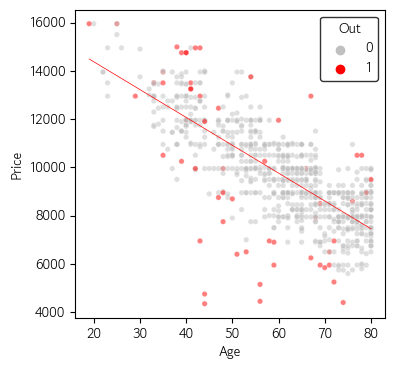

In [55]:
sns.scatterplot(x = trainX['Age'], y = trReal, hue = trainX['Out'], 
                hue_order = ['0', '1'], palette = ['silver', 'red'], 
                s = 15, alpha = 0.5)
sns.regplot(x = trainX['Age'], y = trReal, 
            scatter_kws = {'alpha': 0}, 
            line_kws = {'color': 'red', 'lw': 0.5}, 
            ci = None);

In [56]:
trainX['Out'].value_counts()

Out
0    818
1     57
Name: count, dtype: int64

In [59]:
outIndex = trainX[trainX['Out'].eq('1')].index

In [60]:
trainX = trainX.drop(index = outIndex, columns = 'Out')
trReal = trReal.drop(index = outIndex)

In [61]:
fit2 = hds.stat.ols(y = trReal, X = trainX)

In [62]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     426.9
Date:                Thu, 25 May 2023   Prob (F-statistic):          8.51e-267
Time:                        11:07:30   Log-Likelihood:                -6696.8
No. Observations:                 818   AIC:                         1.341e+04
Df Residuals:                     810   BIC:                         1.345e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3432.0746   2083.542     -1.647      0.100   -7521.853     657.704
Age          -95.4639      2.581    -36.992      0.000    -100.529     -90.398
KM            -0.0156      0.001    -13.317      0.000      -0.018      -0.013
HP             1.8192      4.414      0.412      0.680      -6.846      10.484
MetColor      -7.5377     65.265     -0.115      0.908    -135.646     120.571
Doors         28.8330     41.435      0.696      0.487     -52.499     110.165
Weight        17.6152      2.089      8.434      0.000      13.516      21.715
Petrol      1195.3627    304.186      3.930      0.000     598.278    1792.448
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                1.048
Skew:                           0.039   Prob(JB):                        0.592
Kurtosis:                       2.843   Cond. No.                     5.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
hds.stat.breushpagan(fit2)

,Statistic,P-Value,F-Value,F P-Value
0,8.366185,0.301414,1.19571,0.302525


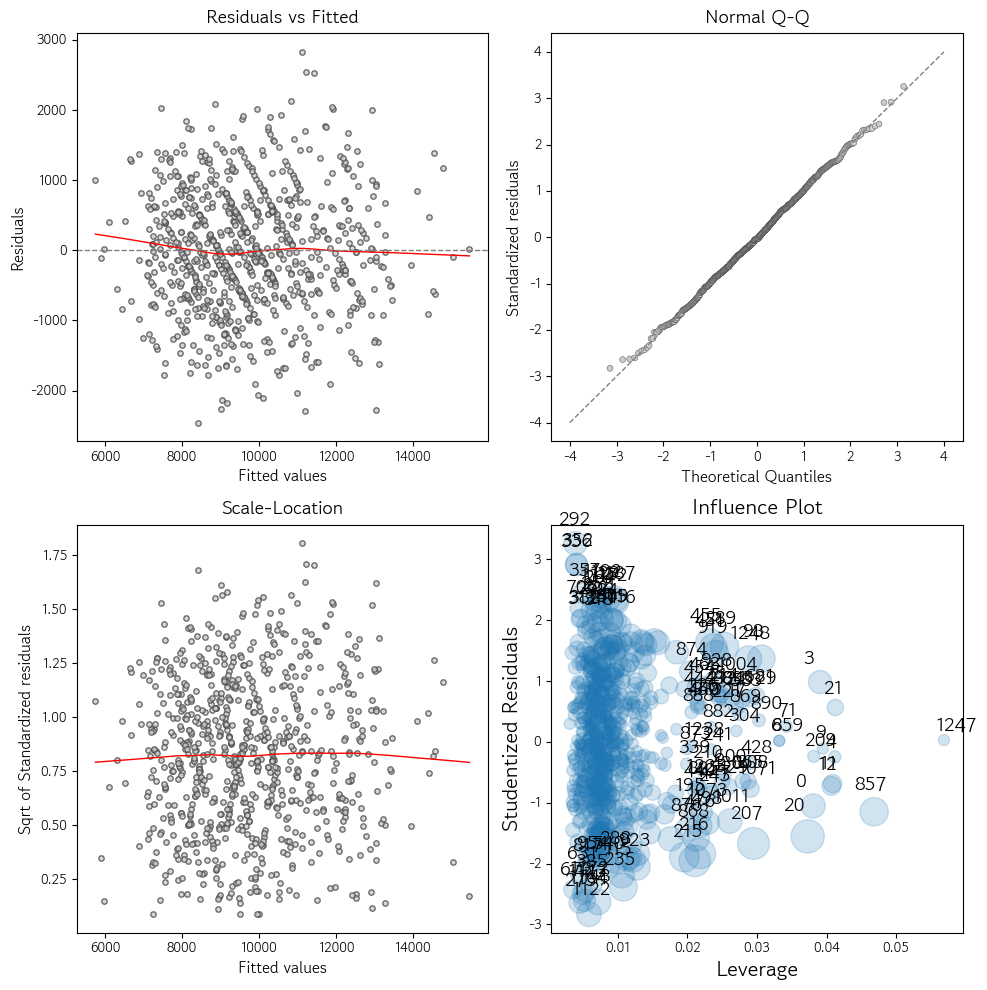

In [64]:
hds.stat.regressionDiagnosis(fit2)

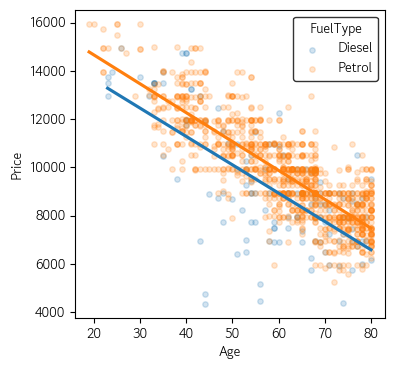

In [67]:
labels = ['Diesel', 'Petrol']
for i, v in enumerate(labels):
    sns.regplot(data = df[df['Petrol'].eq(i)], 
                x = 'Age', y = 'Price', 
                ci = None, label = v, 
                scatter_kws = {'s': 15, 'alpha': 0.2})
plt.legend(loc = 'best', title = 'FuelType');

In [68]:
trPred1 = fit1.predict(trainX)
trPred2 = fit2.predict(trainX)

In [69]:
pd.DataFrame(data = {
    'Real': trReal, 
    'Pred1': trPred1, 
    'Pred2': trPred2
})

,Real,Pred1,Pred2
1116,9950,8212.688258,8226.681854
412,9950,10436.102722,10394.199786
1210,8950,9550.133259,9514.325996
1219,8500,7485.487933,7515.104154
272,11450,9529.456411,9572.011526
...,...,...,...
763,7750,8545.952059,8566.167320
835,10900,10344.562892,10345.162525
1216,8250,9772.272505,9756.644043
559,8950,9540.716942,9520.295364


In [70]:
vaPred1 = fit1.predict(validX)
vaPred2 = fit2.predict(validX)

In [71]:
pd.DataFrame(data = {
    'Real': vaReal, 
    'Pred1': vaPred1, 
    'Pred2': vaPred2
})

,Real,Pred1,Pred2
711,8250,8800.801021,8845.334621
898,6500,6284.138610,6466.254731
186,14350,11924.453203,11947.344194
867,6500,6801.433045,6950.609137
18,14900,14557.039154,14479.868632
...,...,...,...
881,7950,7299.860934,7417.890822
367,12950,11563.424966,11546.141069
608,8950,9845.690039,9854.445784
968,8750,8101.974953,8135.849844


In [72]:
hds.stat.regmetrics(y_true = trReal, y_pred = trPred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,758864.050552,871.128033,0.093222,700.06119,0.07487


In [73]:
hds.stat.regmetrics(y_true = trReal, y_pred = trPred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,755913.113385,869.432639,0.093082,697.674218,0.074753


In [74]:
hds.stat.regmetrics(y_true = vaReal, y_pred = vaPred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,928775.181089,963.729828,0.10482,759.234224,0.08115


In [75]:
hds.stat.regmetrics(y_true = vaReal, y_pred = vaPred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.6213,956.297873,0.103322,754.908886,0.080621


In [77]:
hds.stat.vif(trainX)

,Age,KM,HP,MetColor,Doors,Weight,Petrol
0,1.277925,1.525285,3.11695,1.014911,1.66822,4.660574,6.113231


In [78]:
trainX1 = trainX.drop(columns = 'Petrol')

In [79]:
hds.stat.vif(trainX1)

,Age,KM,HP,MetColor,Doors,Weight
0,1.260756,1.424805,1.146407,1.010759,1.3369,1.503799


In [80]:
fit3 = hds.stat.stepwise(y = trReal, X = trainX, direction = 'both')

In [81]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     749.3
Date:                Thu, 25 May 2023   Prob (F-statistic):          6.39e-271
Time:                        13:17:11   Log-Likelihood:                -6697.1
No. Observations:                 818   AIC:                         1.340e+04
Df Residuals:                     813   BIC:                         1.343e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4457.5787   1447.801     -3.079      0.002   -7299.448   -1615.710
Age          -95.5644      2.569    -37.193      0.000    -100.608     -90.521
KM            -0.0156      0.001    -13.326      0.000      -0.018      -0.013
Weight        18.7371      1.249     14.997      0.000      16.285      21.189
Petrol      1339.1472    169.036      7.922      0.000    1007.348    1670.946
==============================================================================
Omnibus:                        1.064   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                1.125
Skew:                           0.045   Prob(JB):                        0.570
Kurtosis:                       2.843   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
hds.stat.breushpagan(fit3)

,Statistic,P-Value,F-Value,F P-Value
0,2.377408,0.666714,0.592441,0.668196


In [83]:
fit3.params

Intercept   -4457.578687
Age           -95.564396
KM             -0.015560
Weight         18.737084
Petrol       1339.147200
dtype: float64

In [86]:
hds.stat.std_coefs(fit3).abs().sort_values()

Intercept    0.000000
Petrol       0.176717
KM           0.265951
Weight       0.314424
Age          0.679624
dtype: float64

In [87]:
vaPred3 = fit3.predict(validX)

In [88]:
hds.stat.regmetrics(y_true = vaReal, y_pred = vaPred3)

,MSE,RMSE,RMSLE,MAE,MAPE
0,911188.631242,954.56201,0.103245,751.766366,0.080308


In [89]:
hds.stat.regmetrics(y_true = vaReal, y_pred = vaPred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.6213,956.297873,0.103322,754.908886,0.080621
